In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading the datsets and assigning columns

results = pd.read_csv('C:/Users/rupin/Downloads/F1 Datasets/results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position', 'position_text', 'position_order', 'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id'], header = None)
races = pd.read_csv('C:/Users/rupin/Downloads/F1 Datasets/races.csv', names = ['race_id', 'year', 'round', 'circuit_id', 'name', 'date', 'time', 'url'], header = None)
drivers = pd.read_csv('C:/Users/rupin/Downloads/F1 Datasets/drivers.csv', names = ['driver_id', 'driver_ref', 'number', 'code', 'first_name', 'last_name', 'dob', 'nationality', 'url'], header = None)
constructors = pd.read_csv('C:/Users/rupin/Downloads/F1 Datasets/constructors.csv', names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url'], header = None)

In [3]:
#merging datasets

df = pd.merge(results, races[['race_id', 'year', 'name', 'round']], on = 'race_id', how = 'left')
df = pd.merge(df, drivers[['driver_id', 'driver_ref', 'nationality']], on = 'driver_id', how = 'left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality']], on = 'constructor_id', how = 'left')

In [4]:
#drop columns

df.drop(['number', 'position', 'position_text', 'laps', 'fastest_lap', 'status_id', 'result_id', 'race_id', 'driver_id', 'constructor_id'], axis = 1, inplace = True)

In [5]:
#rename columns

df.rename(columns = {'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality',
                     'name_y':'constructor_name', 'nationality_y':'constructor_nationality', 'driver_ref':'driver'}, inplace = True)

In [6]:
#rearranging columns

df = df[['year', 'gp_name', 'round', 'driver', 'constructor_name', 'grid', 'position_order', 'points', 'time',
         'milliseconds', 'fastest_lap_rank', 'fastest_lap_time', 'fastest_lap_speed', 'driver_nationality', 'constructor_nationality']]

In [7]:
# Sorting values

df = df.sort_values(by=['year','round','position_order'], ascending = [False, True, True])

In [8]:
# Replace \N values in time columns

df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastest_lap_time.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)

In [9]:
#Changing datatypes

df['fastest_lap_speed'] = pd.to_numeric(df['fastest_lap_speed'], errors='coerce')
df['fastest_lap_rank'] = pd.to_numeric(df['fastest_lap_rank'], errors='coerce')
df['milliseconds'] = pd.to_numeric(df['milliseconds'], errors='coerce')

In [10]:
#reset index

df.reset_index(drop=True, inplace=True)

In [11]:
#shape

print(df.shape)

(25461, 15)


In [12]:
#info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25461 entries, 0 to 25460
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25461 non-null  object 
 1   gp_name                  25461 non-null  object 
 2   round                    25461 non-null  object 
 3   driver                   25461 non-null  object 
 4   constructor_name         25461 non-null  object 
 5   grid                     25461 non-null  object 
 6   position_order           25461 non-null  object 
 7   points                   25461 non-null  object 
 8   time                     6851 non-null   object 
 9   milliseconds             6849 non-null   float64
 10  fastest_lap_rank         7211 non-null   float64
 11  fastest_lap_time         7011 non-null   object 
 12  fastest_lap_speed        7010 non-null   float64
 13  driver_nationality       25461 non-null  object 
 14  constructor_nationalit

In [13]:
#head

df.head(10)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,year,name,round,driverRef,name,grid,positionOrder,points,time,NaN,NaN,fastestLapTime,NaN,nationality,nationality
1,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26,37:33.6,5853584.0,1.0,01:34.6,206.018,Monegasque,Italian
2,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1,23.064,5876648.0,9.0,01:36.7,201.512,Chinese,Swiss
3,2022,Bahrain Grand Prix,1,mick_schumacher,Haas F1 Team,12,11,0,32.574,5886158.0,11.0,01:37.0,200.948,German,American
4,2022,Bahrain Grand Prix,1,stroll,Aston Martin,19,12,0,45.873,5899457.0,15.0,01:37.1,200.555,Canadian,British
5,2022,Bahrain Grand Prix,1,albon,Williams,14,13,0,53.932,5907516.0,18.0,01:37.4,200.125,Thai,British
6,2022,Bahrain Grand Prix,1,ricciardo,McLaren,18,14,0,54.975,5908559.0,16.0,01:37.3,200.318,Australian,British
7,2022,Bahrain Grand Prix,1,norris,McLaren,13,15,0,56.335,5909919.0,12.0,01:37.0,200.882,British,British
8,2022,Bahrain Grand Prix,1,latifi,Williams,20,16,0,+1:01.795,5915379.0,20.0,01:38.3,198.300,Canadian,British
9,2022,Bahrain Grand Prix,1,hulkenberg,Aston Martin,17,17,0,+1:03.829,5917413.0,19.0,01:38.2,198.401,German,British


In [14]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

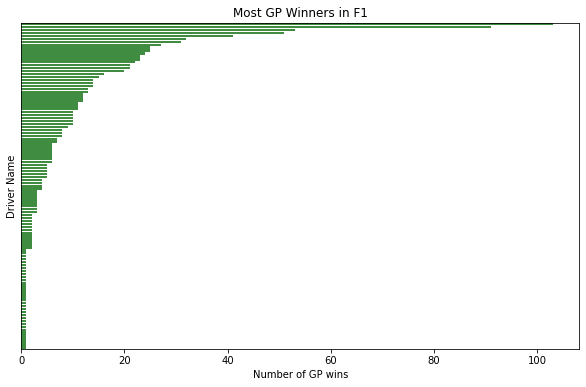

In [15]:

# GP Winners

driver_winner = df.loc[df['position_order']=='1'].groupby('driver')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()


# Barplot

sns.barplot(y = 'driver', x = 'position_order', data = driver_winner, color = 'green', alpha = 0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [16]:
# create new dataframe of top 10 GP winners

top10Drivers = driver_winner.head(10)

print(top10Drivers)

               driver  position_order
0            hamilton             103
1  michael_schumacher              91
2              vettel              53
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


Text(0.5, 0, 'Number of GP Wins')

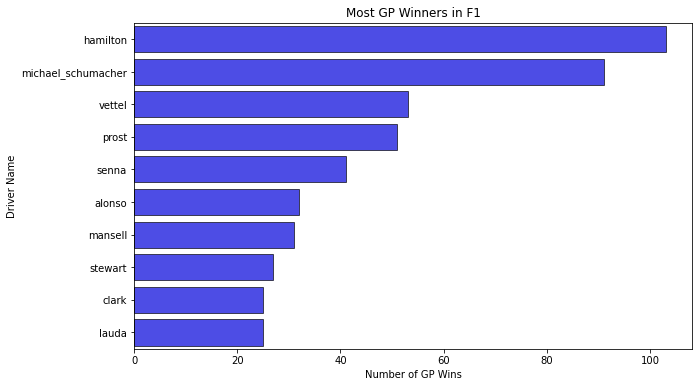

In [17]:
# Top 10 drivers plot

sns.barplot(data = top10Drivers, y = 'driver', x = 'position_order', color = 'blue', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP Wins')

([], [])

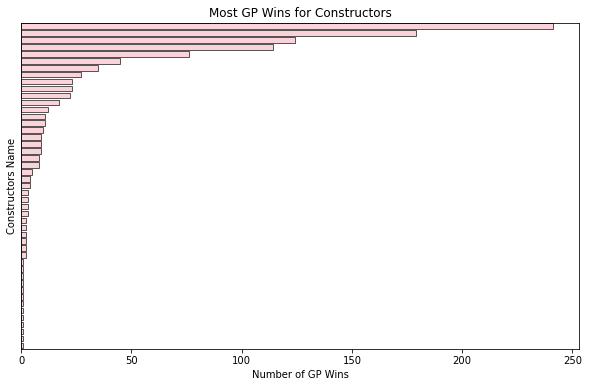

In [18]:
# GP constructor winners

constructor_winner = df.loc[df['position_order'] == '1'].groupby('constructor_name')['position_order'].count().sort_values(ascending=False).to_frame().reset_index()

# Barplot

sns.barplot(data = constructor_winner, y = 'constructor_name', x = 'position_order', 
            color = 'pink', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Most GP Wins for Constructors')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP Wins')
plt.yticks([])

In [19]:
# top 10 GP constructors winners

top10Constructors = constructor_winner.head(10)

print(top10Constructors)

  constructor_name  position_order
0          Ferrari             241
1          McLaren             179
2         Mercedes             124
3         Williams             114
4         Red Bull              76
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP Wins')

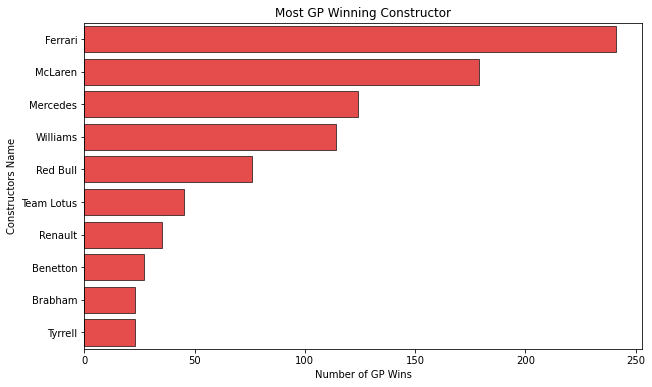

In [20]:
# Barplot of top 10 constructors

sns.barplot(data = top10Constructors, y = 'constructor_name', x = 'position_order', 
            color = 'red', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Most GP Winning Constructor')
plt.ylabel('Constructors Name')
plt.xlabel('Number of GP Wins')

Text(0.5, 0.98, 'Average speed amongst all teams during the fastest lap at individual GPs')

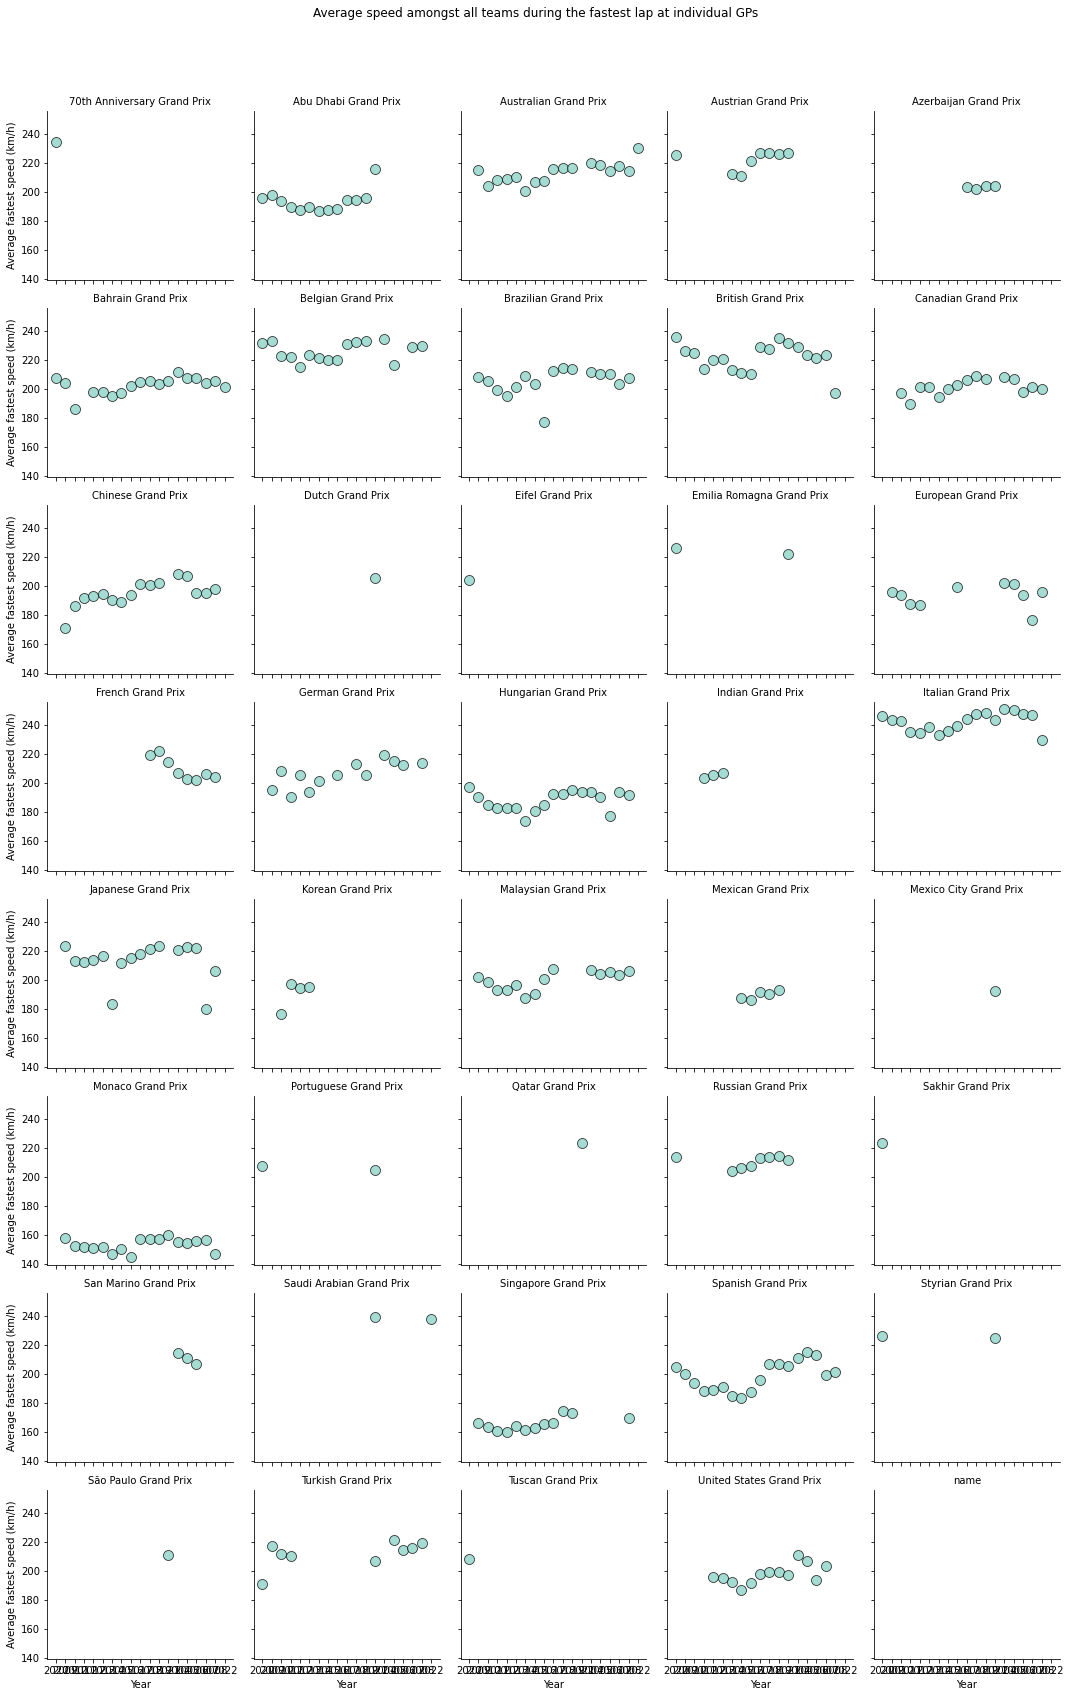

In [21]:
#creating new data frame for seasons 2004 onwards
df_speed = df[df['year'] >= '2004']
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

#Creating a FacetGrid
g = sns.FacetGrid(data = df_group_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha = 0.8, linewidth = 0.8, edgecolor = "black", s = 100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs')
